# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0026'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 1
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


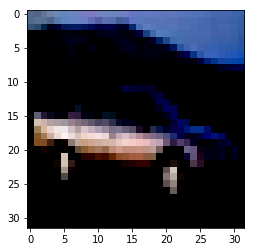

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGANGP(input_dim = (32,32,3)
        , critic_conv_filters = [64,64,128,128]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_upsample = [True,True, False,False]
        , generator_conv_filters = [128,64, 64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , grad_weight = 10
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               51712     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              2101248   
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
__________

## training

In [15]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , n_critic = 5
    , using_generator = False

)

72 (5, 1) [D loss: (-4.8)(R 4.8, F -9.9, G 0.0)] [G loss: 9.9]
73 (5, 1) [D loss: (-4.4)(R 2.0, F -6.8, G 0.0)] [G loss: 8.0]
74 (5, 1) [D loss: (-3.8)(R -2.8, F -1.5, G 0.0)] [G loss: 5.9]
75 (5, 1) [D loss: (-4.0)(R 0.5, F -4.9, G 0.0)] [G loss: 7.6]
76 (5, 1) [D loss: (-3.7)(R 1.1, F -5.3, G 0.0)] [G loss: 4.7]
77 (5, 1) [D loss: (-4.0)(R -0.6, F -3.8, G 0.0)] [G loss: 5.3]
78 (5, 1) [D loss: (-3.9)(R 1.4, F -5.4, G 0.0)] [G loss: 8.3]
79 (5, 1) [D loss: (-3.5)(R 1.5, F -5.3, G 0.0)] [G loss: 0.8]
80 (5, 1) [D loss: (-3.7)(R 3.2, F -7.2, G 0.0)] [G loss: 9.5]
81 (5, 1) [D loss: (-3.3)(R -1.9, F -1.7, G 0.0)] [G loss: 1.2]
82 (5, 1) [D loss: (-3.2)(R -1.7, F -1.8, G 0.0)] [G loss: 3.5]
83 (5, 1) [D loss: (-3.4)(R 2.5, F -6.2, G 0.0)] [G loss: 6.8]
84 (5, 1) [D loss: (-3.1)(R 1.9, F -5.3, G 0.0)] [G loss: 6.8]
85 (5, 1) [D loss: (-3.0)(R -7.3, F 3.9, G 0.0)] [G loss: 5.2]
86 (5, 1) [D loss: (-3.2)(R -5.7, F 2.3, G 0.0)] [G loss: -5.6]
87 (5, 1) [D loss: (-2.5)(R 2.6, F -5.3, G 0.0)] [

KeyboardInterrupt: 

In [ ]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
gan.discriminator.predict(np.array([x_train[idx]]))

In [ ]:
noise = np.random.normal(0, 1, (1, gan.z_dim))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.predict(np.array([gen_imgs[0]]))

In [ ]:
gan.train_discriminator(x_train, batch_size = 32, clip_threshold = 0.01)

In [ ]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
# gan.discriminator.train_on_batch(gen_imgs, fake)

In [ ]:
[(np.min(x), np.max(x)) for x in gan.discriminator.get_weights()]

In [ ]:
gan.train_generator(batch_size = 128)

In [ ]:
[np.round((np.min(x), np.max(x)), 4) for x in gan.generator.get_weights()]

In [ ]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
plt.imshow(np.clip((gen_imgs[100]+1)*0.5,0,1))

In [ ]:
gan.discriminator.predict(x)

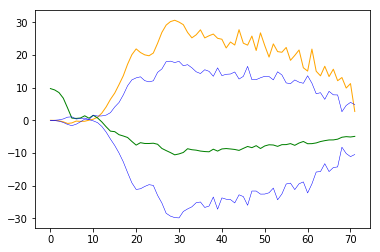

In [14]:
plt.plot(gan.g_losses, color='orange', linewidth=1)
plt.plot([x[0] for x in gan.d_losses], color='green', linewidth=1)
plt.plot([x[1] for x in gan.d_losses], color='blue', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='blue', linewidth=0.5)


In [16]:
gan.d_losses

[[9.712793, -0.021589002, 0.00023756124, 0.9734145],
 [9.292482, -0.09521676, 0.023502707, 0.9364197],
 [8.484461, -0.2724628, 0.13239037, 0.8624534],
 [6.781767, -0.6570329, 0.40950206, 0.7029298],
 [3.7839234, -1.2681181, 0.9652281, 0.40868136],
 [0.6696502, -1.6310061, 1.0569742, 0.12436822],
 [0.57588875, -1.2045791, 0.38126293, 0.1399205],
 [0.69993293, -0.4834251, 0.55212635, 0.063123174],
 [1.3797443, 0.36920774, 0.6803542, 0.033018228],
 [0.6412577, 0.24487923, 0.24440722, 0.015197124],
 [1.5292203, 1.5586866, -0.18100432, 0.015153796],
 [0.7206833, 1.3072059, -0.7145843, 0.012806163],
 [-0.50818455, 1.338218, -1.8857976, 0.0039395085],
 [-1.9878968, 1.5900763, -3.6136255, 0.0035652255],
 [-3.3243172, 2.336929, -5.738769, 0.007752285],
 [-3.4756038, 4.073467, -7.70636, 0.015728937],
 [-4.4066877, 5.450396, -10.013626, 0.015654255],
 [-4.8044424, 7.767126, -12.723664, 0.015209599],
 [-5.2614074, 10.5736685, -16.002504, 0.016742866],
 [-6.472101, 12.375777, -19.140879, 0.02930004

In [17]:
gan.g_losses

[0.0015914603,
 -0.02937794,
 -0.15890738,
 -0.4630575,
 -0.96253306,
 -0.802805,
 -0.23744728,
 -0.3332591,
 -0.2918672,
 0.042336203,
 0.33708254,
 0.9403269,
 2.2233832,
 4.1012692,
 6.4142685,
 8.334853,
 10.920329,
 13.642928,
 17.166975,
 20.08961,
 21.860605,
 20.756817,
 20.04144,
 19.762066,
 20.590778,
 23.578043,
 26.914032,
 29.158293,
 30.21884,
 30.637718,
 30.072481,
 29.282927,
 26.89973,
 25.248434,
 26.179405,
 27.70533,
 25.232615,
 25.886162,
 26.412056,
 25.111116,
 24.821726,
 22.14865,
 23.973001,
 23.050638,
 27.756233,
 23.612274,
 23.013338,
 25.80057,
 21.373617,
 26.773348,
 22.88965,
 19.355423,
 23.400454,
 21.033855,
 20.834217,
 22.312632,
 18.366093,
 19.865324,
 21.529264,
 16.089382,
 15.070022,
 21.80688,
 15.022739,
 13.617646,
 16.54608,
 13.387997,
 15.645461,
 12.122712,
 13.094619,
 9.87813,
 11.245943,
 2.6945534,
 9.891329,
 8.018006,
 5.87541,
 7.615998,
 4.7429276,
 5.326627,
 8.298918,
 0.8365704,
 9.508805,
 1.2454412,
 3.5104525,
 6.83776